# MethylSeekR & Gviz Practice

Wanna figure out what I can do with MethylSeekR and visualize the results. Samples are from IHEC project hg19 https://epigenomesportal.ca/ihec/grid.html?assembly=1&build=2018-10

In [2]:
# Various basic R packages
library(MethylSeekR)

# DataFrames underlying GRanges
library(S4Vectors)

# Because the data samples I am using are from the IHEC 
#    https://epigenomesportal.ca/ihec/grid.html?assembly=1&build=2018-10 database as .bigwig:
# For importing .bigwig files: https://kasperdanielhansen.github.io/genbioconductor/html/rtracklayer_Import.html
library(rtracklayer)
library(AnnotationHub)
library(Rsamtools)

In [4]:
# Importing ES Cell samples
imported_unstranded1 <- import(format="BigWig", con="/Users/oliviagallup/Downloads/IHEC_blood_cells/63118.DEEP.43_Hm01_BlMo_Ct.WGB-Seq.signal_unstranded.bigWig")

sLengths1 <- seqlengths(imported_unstranded1)

methylome1 <- readMethylome(FileName="/Users/oliviagallup/Downloads/IHEC_blood_cells/63119.DEEP.43_Hm01_BlMo_Ct.WGB-Seq.methylation_profile.bigWig", seqLengths=sLengths1)


# Importing using the readMethylome function doesn't work nor is it necessary because we already imported the files as GRanges above and they'd need to be text
# methylome_wgbs <- readMethylome(FileName="/Users/oliviagallup/Downloads/28736.Roadmap.SRS004212_Combined_Libraries_424.WGB-Seq.signal.bigWig", seqLengths=sLengths)




reading methylome data


ERROR: Error in scan(FileName, what = list(chr = character(0), pos = integer(0), : scan() expected 'a real', got 'chr12'


In [5]:
sLengths_H1 <- seqlengths(gr_wgbs_combined_H1)
#head(sLengths)
#sLengths

[05. Aug]: Ok so we don't really know why there's only 1 metadata file from the IHEC data set https://epigenomesportal.ca/ihec/grid.html?assembly=1&build=2018-10 (the one I used was for ES Cells). Anne-Claire said there should be multiple cell samples meaning more columns in the metadata denoting the methylation level in each.

[06. Aug] Each of the IHEC files I downloaded earlier was actually a single cell sample 

In [25]:
# Displaying the data from our cell line samples to make sure that they are all indexed similarly in 'ranges'... they aren't
tail(gr_wgbs_combined_H1)
tail(gr_wgbs_HUES64_1)
tail(gr_wgbs_combined_H9)
head(gr_wgbs_HUES64_2)

GRanges object with 6 ranges and 1 metadata column:
      seqnames            ranges strand |             score
         <Rle>         <IRanges>  <Rle> |         <numeric>
  [1]     chrY 59362340-59362341      * | 0.923076987266541
  [2]     chrY 59362382-59362383      * | 0.818181991577148
  [3]     chrY 59362392-59362393      * |                 1
  [4]     chrY 59362399-59362400      * |                 1
  [5]     chrY 59362493-59362494      * |                 1
  [6]     chrY 59362591-59362592      * | 0.692308008670807
  -------
  seqinfo: 25 sequences from an unspecified genome

GRanges object with 6 ranges and 1 metadata column:
      seqnames            ranges strand |             score
         <Rle>         <IRanges>  <Rle> |         <numeric>
  [1]     chrY 59362392-59362393      * | 0.899999976158142
  [2]     chrY 59362399-59362400      * |             0.875
  [3]     chrY 59362485-59362486      * |                 1
  [4]     chrY 59362488-59362489      * |                 1
  [5]     chrY 59362493-59362494      * |                 1
  [6]     chrY 59362591-59362592      * |              0.75
  -------
  seqinfo: 25 sequences from an unspecified genome

GRanges object with 6 ranges and 1 metadata column:
      seqnames            ranges strand |             score
         <Rle>         <IRanges>  <Rle> |         <numeric>
  [1]     chrY 59362312-59362313      * |             0.875
  [2]     chrY 59362320-59362321      * |            0.9375
  [3]     chrY 59362340-59362341      * |                 1
  [4]     chrY 59362382-59362383      * | 0.888889014720917
  [5]     chrY 59362392-59362393      * |                 1
  [6]     chrY 59362399-59362400      * |                 1
  -------
  seqinfo: 25 sequences from an unspecified genome

GRanges object with 6 ranges and 1 metadata column:
      seqnames      ranges strand |             score
         <Rle>   <IRanges>  <Rle> |         <numeric>
  [1]     chr1 10469-10470      * | 0.944444000720978
  [2]     chr1 10471-10472      * |                 1
  [3]     chr1 10484-10485      * | 0.940298020839691
  [4]     chr1 10489-10490      * | 0.943661987781525
  [5]     chr1 10493-10494      * | 0.930555999279022
  [6]     chr1 10497-10498      * | 0.897436022758484
  -------
  seqinfo: 25 sequences from an unspecified genome

Need a way of aligning the binned chromosome methylation ranges... acc nvm. These are not samples of the same cells. There may have been multiple samples all processed already in each IHEC file, but the files represent different ES cell types not different samples of the same ES Cells. 

We should visualize the PMD's and see how they differ between the cell lines. That means find the PMD's for each cell type and (use GViz?) visualize them. The IHEC data I'm using at the moment already has the conglomerated methylation score in the metadata column, but otherwise the segmentPMDs() function could be used to find the regions of interest. 

Nav says to fabricate the data 🤷‍ The IHEC data of the ES cell types (from hg19) have a metadata line of 'score' that corresponds to methylation level at that location. The reason it's on a scale from 0-1 is because the M number of reads with a methylation signal have been divided by the T total number of reads. Nav said to multiply the score by 10 and then round down the integer, to make the M column. The T column would just be 10. Ima write a funciton for it.


Quick checkpoint on MethylSeekR: best way to learn to use it is follow the vignette, then look at the reference manual PDF from the release page and attempt to do something similar to the vignette but with a rogue data set. Dataframes are from S4Vector package? 

GRanges ref manual: http://bioconductor.org/packages/release/bioc/manuals/GenomicRanges/man/GenomicRanges.pdf
S4Vector ref manual: https://bioconductor.org/packages/release/bioc/manuals/S4Vectors/man/S4Vectors.pdf


In [11]:
# Adding T (total reads) and M (of those methylation reads) columns to metadata

# Initializing the M column with trash values
M <- matrix(0, length(gr_wgbs_combined_H1), 1) 

# Loop through all the metadata values in the 'score' column, multiply them by 10, assign 
# to M (we don't even need a for loop for this)
M[,1] <- floor(mcols(gr_wgbs_combined_H1)[, 1]*10)

# Turn all negative bois to 0 #relu 
M <- pmax(0, M)

# Taking out  and saving the 'score' column somewhere else cuz I think it may be confounding the segmentPMDs
mcol_scores = mcols(gr_wgbs_combined_H1)[, 1]

mcols(gr_wgbs_combined_H1)[, 1] <- matrix(10, length(gr_wgbs_combined_H1), 1)     # T column all 10
mcols(gr_wgbs_combined_H1)[, 2] <- M

# Renaming metadata columns
names(mcols(gr_wgbs_combined_H1))[1] <- 'T'
names(mcols(gr_wgbs_combined_H1))[2] <- 'M'



After removing the 'scores' column from the metadata and replacing it with a T and M column, the segmentPMDs algorithm managed to train the HMM on my selected chromosome, apply the viterbi segmentation, and make the fucking GRanges object. It was probably my scores column and not the T or M columns (which also contained 0's) that were being problematic. Unfortunately takes ages to compile (ca. 10 mins) so I upped the cores from 1 to 3... This did not shorten the compilation time by much so I would change it back in future. Also forgot to save the GRanges object output into a freaking variable which is now PMDsegments.

training PMD-HMM on chromosome chr1
performing viterbi segmentation
creating GRanges object


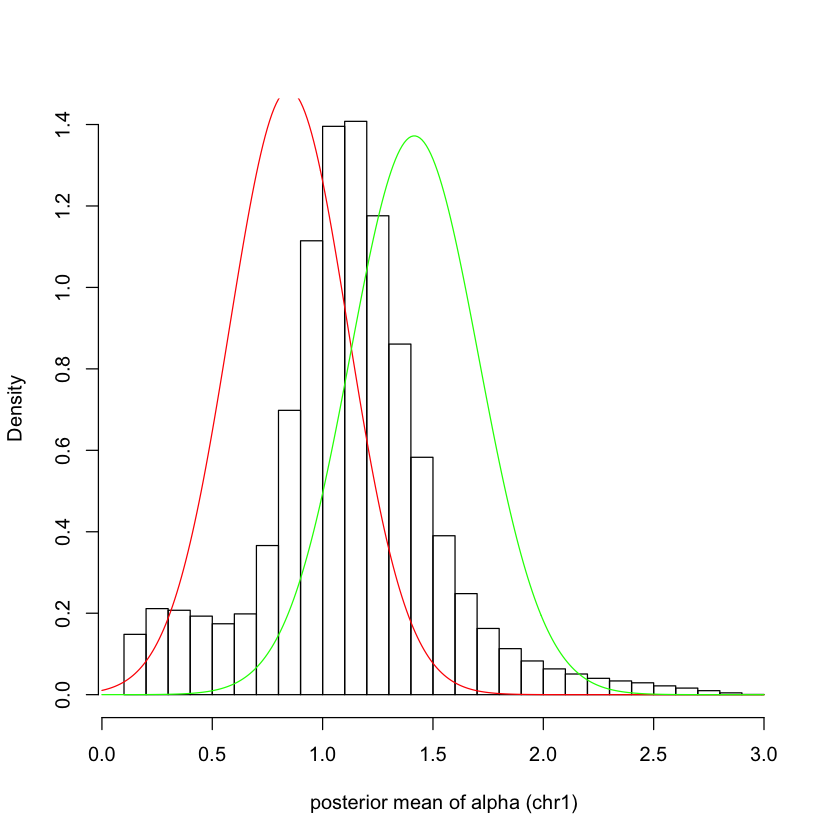

In [13]:
PMDsegments <- segmentPMDs(m=gr_wgbs_combined_H1, chr.sel="chr1", seqLengths=sLengths_H1, num.cores=3)

# Checking for negativity in weights
# negativeValues <- M == 0
# length(negativeValues)



While the alpha graph of our trained HMM segmentation does seem to be bimodal, the red and green curves represent a fitted Gaussian emission distributions of the HMM. The figure above would be unimodal if there were no PMDs, so we can recalculate the alpha distribution with an independent function, plotAlphaDistributionOneChr(), using only the ranges of the chromosome that were classed as not PMDs.

determining alpha distribution for chromosome: chr1


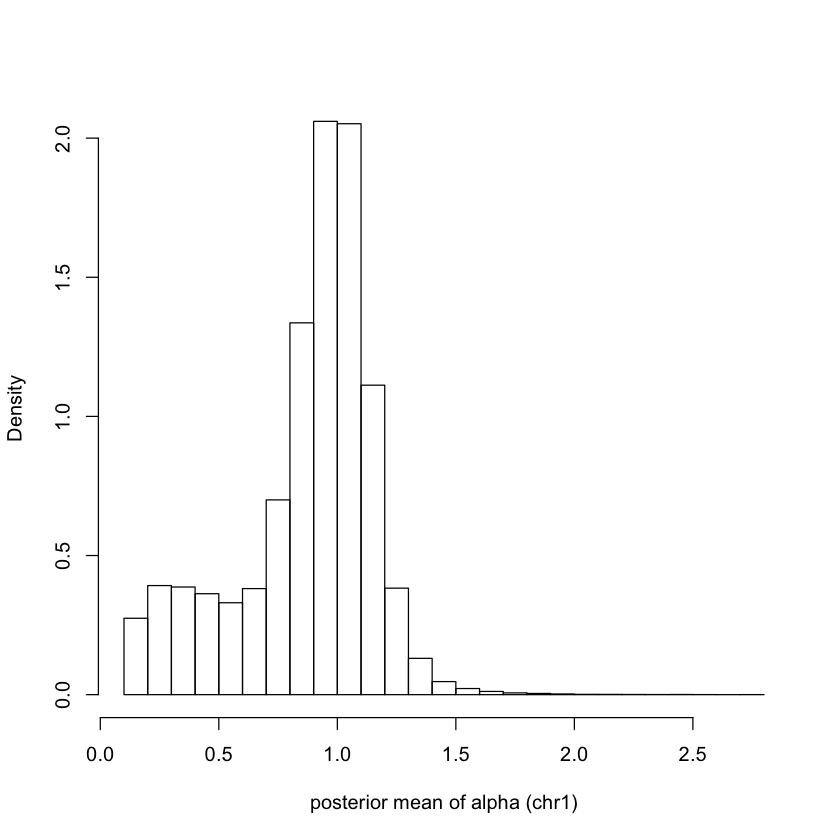

In [14]:
# Control Alpha distribution check
plotAlphaDistributionOneChr(m=subsetByOverlaps(gr_wgbs_combined_H1, PMDsegments[values(PMDsegments)$type=="notPMD"]), chr.sel="chr1", num.cores=1)





So... It seems like the chromosome chosen has problems and potentially doesn't have many PMD's, as the control curve that 
was calculated only with 'notPMD' sections of the chromosome is STILL bimodal. We could train the HMM on a different 
chromosome, or fuq it.

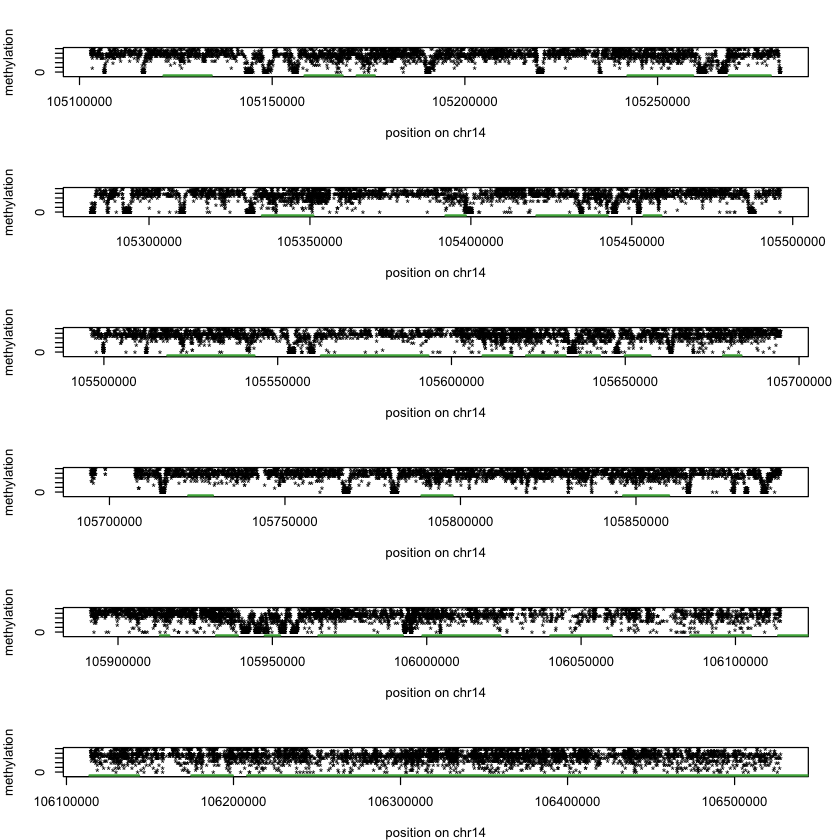

In [18]:
plotPMDSegmentation(m=gr_wgbs_combined_H1, segs=PMDsegments)